In [30]:
%matplotlib inline
from matplotlib import pyplot as plt

import numpy as np
import argparse
import time
import cv2
import os

from PIL import Image

In [20]:
image_dir = "data/test_images/test_images/test_223.png"
mask_dir = "upconv (new config)/test_223.png"

In [21]:
image =cv2.imread(image_dir)
mask = cv2.imread(mask_dir, cv2.IMREAD_GRAYSCALE)
mask_image = cv2.imread(mask_dir)
orig_mask = mask > 127
cut_mask = mask > 32

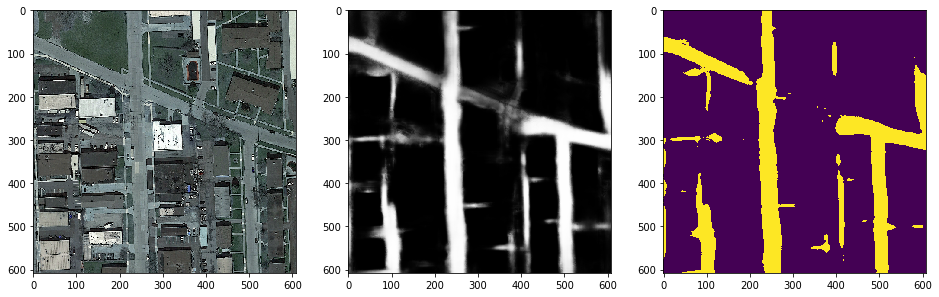

In [22]:
f, axarr = plt.subplots(1,3)
f.set_size_inches(16, 16, forward=True)
axarr[0].imshow(image)
axarr[1].imshow(mask_image)
axarr[2].imshow(orig_mask)
plt.show()

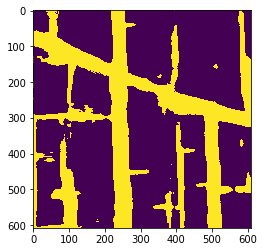

In [23]:
mask[cut_mask > 0] = cv2.GC_PR_FGD
mask[cut_mask == 0] = cv2.GC_BGD
plt.imshow(cut_mask)

In [24]:
# allocate memory for two arrays that the GrabCut algorithm internally
# uses when segmenting the foreground from the background
fgModel = np.zeros((1, 65), dtype="float")
bgModel = np.zeros((1, 65), dtype="float")
# apply GrabCut using the the mask segmentation method
start = time.time()
(mask, bgModel, fgModel) = cv2.grabCut(mask_image, mask, None, bgModel,
	fgModel, iterCount=10, mode=cv2.GC_INIT_WITH_MASK)
end = time.time()
print("[INFO] applying GrabCut took {:.2f} seconds".format(end - start))

[INFO] applying GrabCut took 1.89 seconds


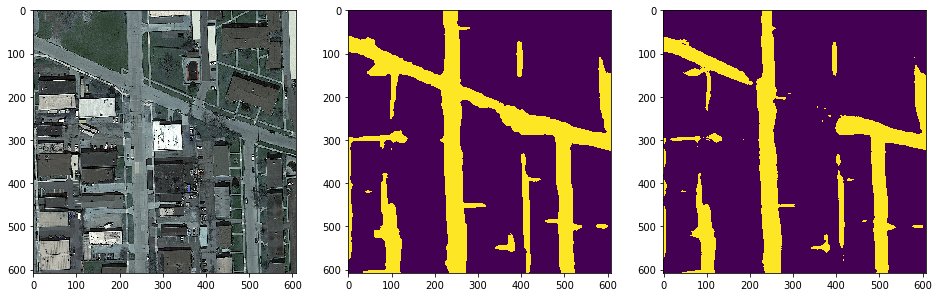

In [25]:
f, axarr = plt.subplots(1,3)
f.set_size_inches(16, 16, forward=True)
axarr[0].imshow(image)
axarr[2].imshow(orig_mask)
axarr[1].imshow(mask == cv2.GC_PR_FGD)
# axarr[1].imshow(mask)
plt.show()

In [36]:
from PIL import Image
im = Image.fromarray((mask == cv2.GC_PR_FGD).astype("uint8") * 255)
im.save("test.png")
# cv2.imwrite("test.png", (mask == cv2.GC_PR_FGD).astype("uint8") * 255, cv2.IMREAD_GRAYSCALE)

[INFO] showing mask for 'Definite Background'
[INFO] showing mask for 'Probable Foreground'


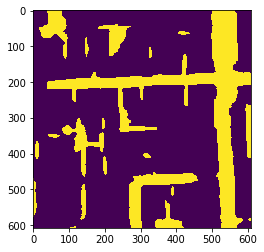

In [44]:
# the output mask has for possible output values, marking each pixel
# in the mask as (1) definite background, (2) definite foreground,
# (3) probable background, and (4) probable foreground
values = (
	("Definite Background", cv2.GC_BGD),
# 	("Probable Background", cv2.GC_PR_BGD),
# 	("Definite Foreground", cv2.GC_FGD),
	("Probable Foreground", cv2.GC_PR_FGD),
)
# loop over the possible GrabCut mask values
for (name, value) in values:
	# construct a mask that for the current value
	print("[INFO] showing mask for '{}'".format(name))
	valueMask = (mask == value).astype("uint8") * 255
	# display the mask so we can visualize it
	plt.imshow(valueMask)

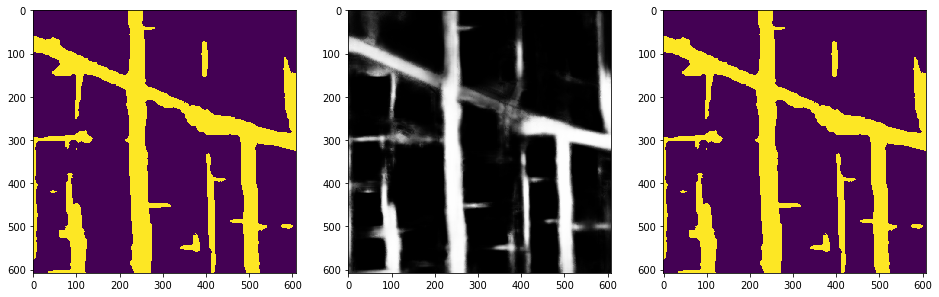

In [37]:
f, axarr = plt.subplots(1,3)
f.set_size_inches(16, 16, forward=True)
axarr[0].imshow(image)
axarr[1].imshow(mask_image)
axarr[2].imshow(cv2.imread("test.png", cv2.IMREAD_GRAYSCALE))
plt.show()

In [38]:
image = np.array(Image.open("test.png")) / 255
np.max(image)

1.0